In [5]:
from cgm2 import *

help(ProbabilitySpace)

d77 = ProbabilitySpace(77)
d77.measure

help(CausalGraphModel)


Help on class ProbabilitySpace in module cgm2:

class ProbabilitySpace(builtins.object)
 |  ProbabilitySpace(nb_events=None, measure: Dict = None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, nb_events=None, measure: Dict = None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

Help on class CausalGraphModel in module cgm2:

class CausalGraphModel(builtins.object)
 |  CausalGraphModel(causal_functions: Dict)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, causal_functions: Dict)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  draw(self)
 |  
 |  generate_random_causes(self, Omega: cgm2.ProbabilitySpace, domain: range, debug=Fals

observed ['Y', 'Z', 'X'] unobserved ['T', 'U']
topological sort ['T', 'U', 'Y', 'Z', 'X']


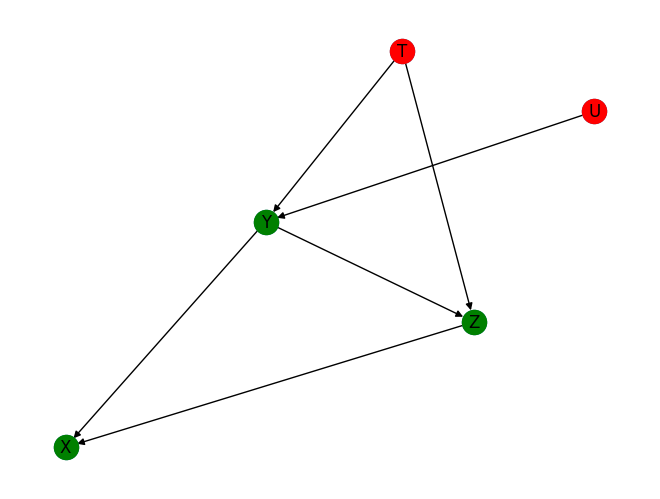

In [6]:
a_model = {\
            'Y':{'U','T'},\
            'Z':{'Y','T'},\
            'X':{'Y','Z'},
}
its_cgm = CausalGraphModel(a_model)
its_cgm.draw()

In [7]:
its_causes = {\
              'U': lambda omega: omega%5,
              'T': lambda omega: (omega**2)%8,
              'Y': lambda args: (args[0]*args[1]+2*args[0])%4,
              'Z': lambda args: (args[1]+args[0])%13,
              'X': lambda args: (args[0]**3+args[1])%22
             }
its_domain = range(22)
Omega = ProbabilitySpace(nb_events=77)

XYZTU = its_cgm.generate_variables_model(Omega,its_domain,causes=its_causes)

In [8]:
XYZTU.print_distribution()

Distribution of (T,U,Y,Z,X)<:>
P(T=0,U=0,Y=0,Z=0,X=0)=4/77
P(T=1,U=1,Y=3,Z=4,X=1)=8/77
P(T=4,U=2,Y=0,Z=4,X=20)=4/77
P(T=1,U=3,Y=1,Z=2,X=9)=8/77
P(T=0,U=4,Y=0,Z=0,X=0)=4/77
P(T=1,U=0,Y=2,Z=3,X=7)=8/77
P(T=4,U=1,Y=0,Z=4,X=20)=4/77
P(T=1,U=2,Y=0,Z=1,X=1)=1/11
P(T=0,U=3,Y=0,Z=0,X=0)=4/77
P(T=1,U=4,Y=2,Z=3,X=7)=1/11
P(T=4,U=0,Y=0,Z=4,X=20)=4/77
P(T=0,U=2,Y=0,Z=0,X=0)=4/77
P(T=4,U=4,Y=0,Z=4,X=20)=4/77
P(T=0,U=1,Y=0,Z=0,X=0)=4/77
P(T=4,U=3,Y=0,Z=4,X=20)=3/77
</:>


In [9]:
XYZTU.are_independant('X','Y')
XYZTU.condition(['T','X'])
XYZTU.print_variables()
XYZTU.print_distributions()

0:1:2:|3:4:
U,Y,Z |X,T 
ys conditional variables [(0, 0), (1, 1), (20, 4), (9, 1), (7, 1)]
|(X=0,T=0) has probability 20/77
Distribution of (U,Y,Z)<:>
P(U=0,Y=0,Z=0)=1/5
P(U=4,Y=0,Z=0)=1/5
P(U=3,Y=0,Z=0)=1/5
P(U=2,Y=0,Z=0)=1/5
P(U=1,Y=0,Z=0)=1/5
</:>
|(X=1,T=1) has probability 15/77
Distribution of (U,Y,Z)<:>
P(U=1,Y=3,Z=4)=8/15
P(U=2,Y=0,Z=1)=7/15
</:>
|(X=20,T=4) has probability 19/77
Distribution of (U,Y,Z)<:>
P(U=2,Y=0,Z=4)=4/19
P(U=1,Y=0,Z=4)=4/19
P(U=0,Y=0,Z=4)=4/19
P(U=4,Y=0,Z=4)=4/19
P(U=3,Y=0,Z=4)=3/19
</:>
|(X=9,T=1) has probability 8/77
Distribution of (U,Y,Z)<:>
P(U=3,Y=1,Z=2)=1
</:>
|(X=7,T=1) has probability 15/77
Distribution of (U,Y,Z)<:>
P(U=0,Y=2,Z=3)=8/15
P(U=4,Y=2,Z=3)=7/15
</:>


In [10]:
its_cgm.search_empirical_conditional_independances(Omega,its_domain,nb_search=1)

observed ['Y', 'Z', 'X'] unobserved ['T', 'U']
topological sort ['T', 'U', 'Y', 'Z', 'X']


{(('T',), ('X',), ('U', 'Y', 'Z')),
 (('T',), ('X',), ('Y', 'Z')),
 (('T',), ('Y',), ('U', 'Z', 'X')),
 (('T',), ('Z',), ('U', 'Y', 'X')),
 (('T', 'U'), ('X',), ('Y', 'Z')),
 (('U',), ('X',), ('T', 'Y')),
 (('U',), ('X',), ('T', 'Y', 'Z')),
 (('U',), ('X',), ('Y', 'Z')),
 (('U',), ('Y',), ('T', 'Z', 'X')),
 (('U',), ('Z',), ('T', 'Y')),
 (('U',), ('Z',), ('T', 'Y', 'X')),
 (('U',), ('Z', 'X'), ('T', 'Y')),
 (('U', 'X'), ('Z',), ('T', 'Y')),
 (('U', 'Z'), ('X',), ('T', 'Y')),
 (('X',), ('Y',), ('T', 'U')),
 (('X',), ('Y',), ('T', 'U', 'Z')),
 (('X',), ('Y', 'Z'), ('T', 'U')),
 (('X',), ('Z',), ('T', 'U')),
 (('X',), ('Z',), ('T', 'U', 'Y')),
 (('X',), ('Z',), ('T', 'Y')),
 (('Y',), ('Z',), ('T', 'U')),
 (('Y',), ('Z',), ('T', 'U', 'X')),
 (('Y',), ('Z', 'X'), ('T', 'U')),
 (('Y', 'X'), ('Z',), ('T', 'U'))}

In [12]:
n = 5
clauses_sat_instance = [(1,2,3),(4,5-1),(2,.3,.1)]

def model_and_causes_of_sat_instance(nb_variables,clauses):
    Xis = [f'X{i}' for i in range(1,nb_variables+1)]
    Cjs = [ f'C{j}' for j in range(len(clauses))]
    andC0js = [f'andC0{j}s' for j in range(1,len(clauses))]
    its_model = {}
    for j in range(len(clauses)):
        its_model[f'C{j}'] = tuple([f'X{abs(i)}' for i in clauses[j]])
    its_model['andC01s'] = {'C0','C1'}
    for j in range(2,len(clauses)):
        its_model[f'andC0{j}s'] = (f'andC1{j-1}s',f'C{j}')
    its_probability_space = ProbabilitySpace(nb_events=2**nb_variables)
    its_causes = {}
    for i in range(nb_variables):
        its_causes[f'X{i}'] = lambda omega, i=i : (omega//2**(i-1))%2
    for j in range(len(clauses)):
        its_causes[f'C{j}'] = lambda arg:{True:1,False:0}[
                               (2*arg[0]-1)*clauses[j][0] > 0\
                            or (2*arg[1]-1)*clauses[j][1] > 0\
                            or (2*arg[1]-1)*clauses[j][1] > 0
                            ]
    its_causes['andC01s'] = lambda arg: arg[0]*arg[1]
    for j in range(2,len(clauses)):
        its_causes[f'andC0{j}'] = lambda arg: arg[0]*arg[1]
    return (its_model,its_causes)

its_model,its_causes = model_and_causes_of_sat_instance(n,clauses_sat_instance)


({'C0': ('X1', 'X2', 'X3'),
  'C1': ('X4', 'X4'),
  'C2': ('X2', 'X0.3', 'X0.1'),
  'andC01s': {'C0', 'C1'},
  'andC02s': ('andC11s', 'C2')},
 {'X0': <function __main__.model_and_causes_of_sat_instance.<locals>.<lambda>(omega, i=0)>,
  'X1': <function __main__.model_and_causes_of_sat_instance.<locals>.<lambda>(omega, i=1)>,
  'X2': <function __main__.model_and_causes_of_sat_instance.<locals>.<lambda>(omega, i=2)>,
  'X3': <function __main__.model_and_causes_of_sat_instance.<locals>.<lambda>(omega, i=3)>,
  'X4': <function __main__.model_and_causes_of_sat_instance.<locals>.<lambda>(omega, i=4)>,
  'C0': <function __main__.model_and_causes_of_sat_instance.<locals>.<lambda>(arg)>,
  'C1': <function __main__.model_and_causes_of_sat_instance.<locals>.<lambda>(arg)>,
  'C2': <function __main__.model_and_causes_of_sat_instance.<locals>.<lambda>(arg)>,
  'andC01s': <function __main__.model_and_causes_of_sat_instance.<locals>.<lambda>(arg)>,
  'andC02': <function __main__.model_and_causes_of_sa

In [ ]:
sat_cgm = CausalGraphModel(its_model)
joint_law = sat_cgm.generate_variables_model()

searched_variable = joint_law.Xs[-1]
marginal_searched_variable = RandomVariable(joint_law.Omega,joint_law.domain,(searched_variable,))
marginal_searched_variable.print_distribution